<a href="https://colab.research.google.com/github/kplr-training/Data-Visualisation/blob/main/Seaborn/raw/titanic-data-visualization-and-ml.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np # alggèbre linéaire
import pandas as pd # data processing, CSV file I/O (exemple: pd.read_csv)

# Les fichiers de données d'entrée sont disponibles dans le répertoire "../input/".
# Par exemple, l'exécution de cette commande (en cliquant sur run ou en appuyant sur Shift+Enter) permet d'obtenir la liste des fichiers présents dans le répertoire d'entrée

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Tous les résultats que vous écrivez dans le répertoire courant sont enregistrés en tant que sortie.

gender_submission.csv
test.csv
train.csv



In [2]:
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
sns.set_style('whitegrid')

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
### Charger la data
titanic_df = pd.read_csv('../input/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


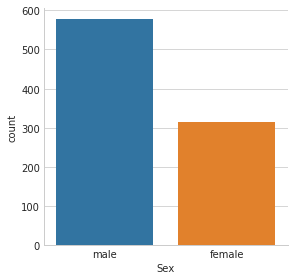

In [5]:
### Qui étaient les passagers du Titanic (âge, sexe, classe sociale, etc.) ?

### Tracé pour la variable 'Sex'
sns.factorplot('Sex',data=titanic_df,kind='count')

### Shows more male passengers than female 

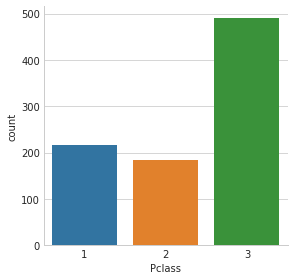

In [6]:
### Tracé pour la variable 'Pclass'
sns.factorplot('Pclass',data=titanic_df,kind='count')

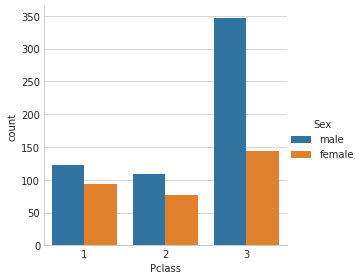

In [7]:
### Intéressant ! Les passagers de la classe 3 sont plus nombreux. Trouvons maintenant le ratio hommes/femmes entre les classes
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [8]:
### Cela nous donne une idée du nombre d'hommes par rapport aux femmes en 3ème classe. Maintenant, creusons un peu plus et trouvons les enfants parmi les passagers.

def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(titanic_children,axis=1)
        

In [9]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


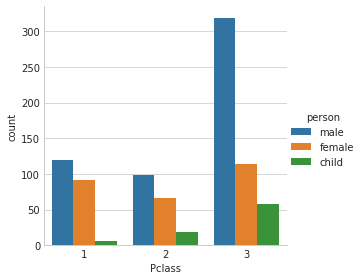

In [10]:
### Tracer un graphique pour vérifier la proportion d'hommes, de femmes et d'enfants dans chaque catégorie de classe
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

More number of males, females and children in the class three. WIll this insight help us in  making  prediction? let's check it out!


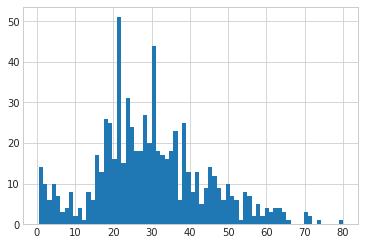

In [11]:
### Voyons maintenant l'âge des passagers
titanic_df['Age'].hist(bins=70)

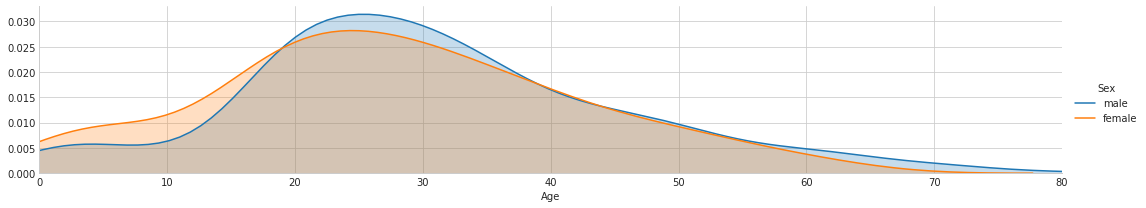

In [12]:
as_fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

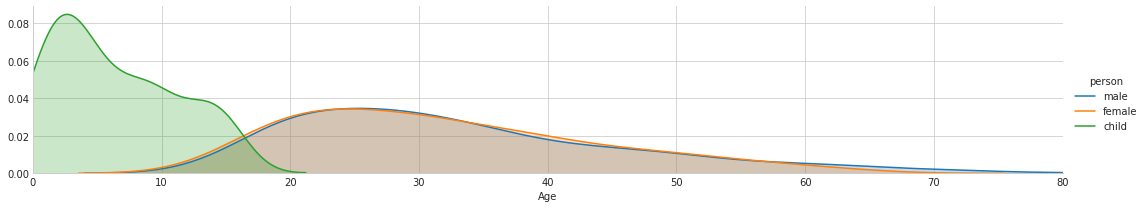

In [13]:
as_fig = sns.FacetGrid(titanic_df,hue='person',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

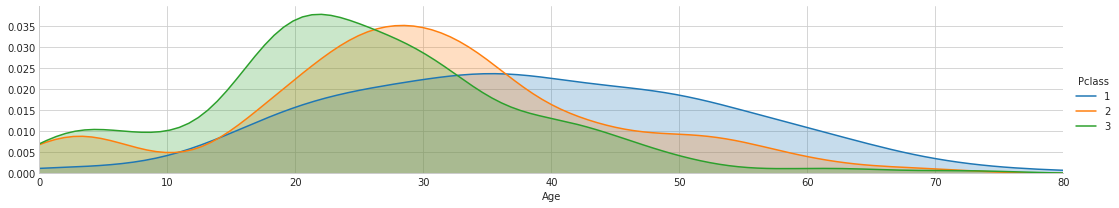

In [14]:
as_fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

From the above graphs, we can infer that there are more number of passengers with a age group of 20 to 40 in all the three classes.

In [15]:
### Âge moyen des passagers
titanic_df['Age'].mean()

29.69911764705882

In [16]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [17]:
#### Supprimer la colonne Cabin car elle contient de nombreuses valeurs nulles et n'aide pas à faire des prédictions.

titanic_df.drop('Cabin',axis=1,inplace=True)

In [18]:
### Remplir les valeurs nulles de la colonne Embarqués par S car il y a plus de passagers embarqués à Southhampton.
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')



In [19]:
### Pour vérifier s'il existe encore des valeurs nulles dans l'ensemble de données
titanic_df.isnull().values.any()

False

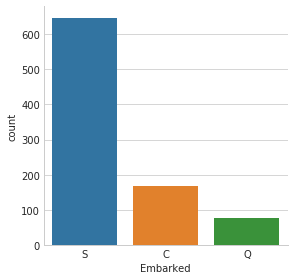

In [20]:
sns.factorplot('Embarked',data=titanic_df,kind='count')

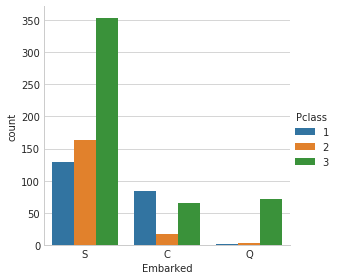

In [21]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count')

It is intereting to see that most of the passengers boarded at Queenstown are from 3rd class. And many passengers boarded at Southhampton. Will this help in making predictions? 

In [22]:
## Vérifions qui est en famille et qui est seul
## Ceci peut être trouvé en additionnant les colonnes Parch et Sibsp
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp


In [23]:
## si la valeur Alone est >0 alors ils sont en famille sinon ils sont Alone

titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Without Family'


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


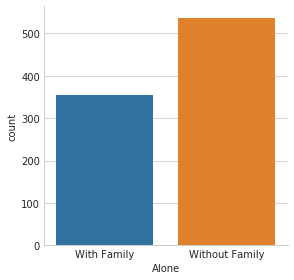

In [24]:
# Visualisons la colonne Alone

sns.factorplot('Alone',kind='count',data=titanic_df)

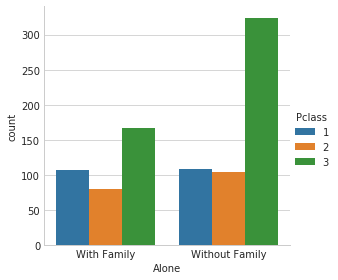

In [25]:
# Voyons qui sont les seuls en fonction de la classe

sns.factorplot('Alone',kind='count',data=titanic_df,hue='Pclass')

Let's dig deeper into data and find out what factors helped survival.

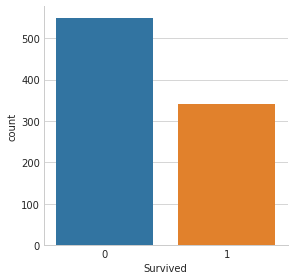

In [26]:
sns.factorplot('Survived',data=titanic_df,kind='count')

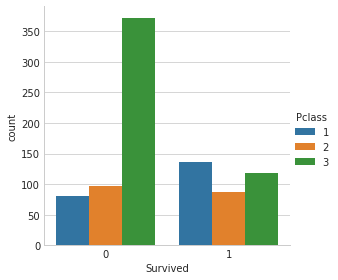

In [27]:
## le contrôle de la classe a eu un effet sur le taux de survie

sns.factorplot('Survived',data=titanic_df,kind='count',hue='Pclass')

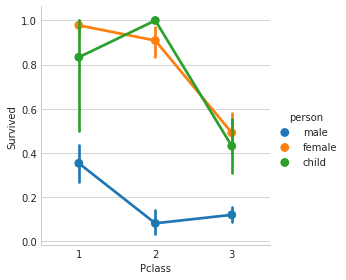

In [28]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

The above graph shows that the survival rate for male is very low nevertheless of the class. And, the survival rate is less for the 3rd class passengers.

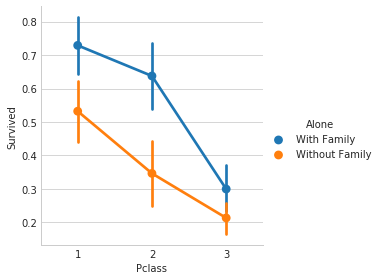

In [29]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='Alone')

As expected, the survival rates are higher if they are with family.  Let us check how Age playes a role in the survival rate.

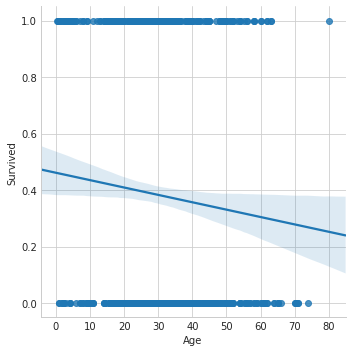

In [30]:
sns.lmplot('Age','Survived',data=titanic_df)

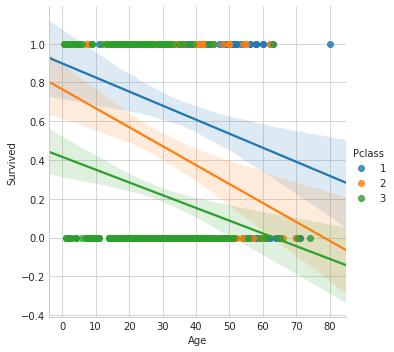

In [31]:


sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')

The above graphs shows that  older the passenger, lesser the chance of survival. 

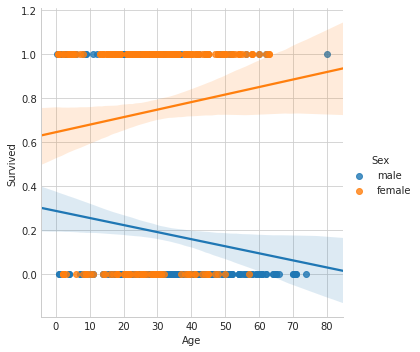

In [32]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex')

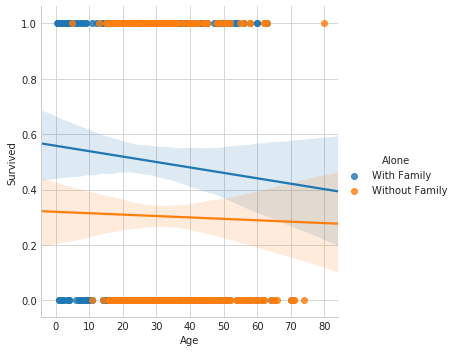

In [33]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Alone')

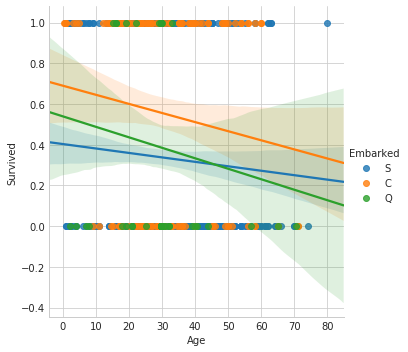

In [34]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Embarked')

Il est choquant de constater que le nombre de passagers embarqués à Southhampton est plus élevé qu'à Cherbourg et Queenstown, mais que le taux de survie est plus élevé pour les passagers de Cherbourg que pour ceux de Southhampton. Il y a donc une chance que l'embarquement aide à la prédiction. Créons des variables indicatrices pour Embarked et laissons tomber Queenstown pour éviter la multicolinéarité (qui pourrait être causée par les variables indicatrices) et il y a peu de passagers embarqués à Queenstown (plus de passagers de 3ème classe qui ont un taux de survie plus faible).

L'analyse nous a permis de comprendre les caractéristiques importantes pour l'établissement de prévisions. 
Caractéristiques à utiliser pour les prédictions : Âge, femme, enfant, avec famille, C, S, classe_1, classe_2, Tarif
Laissons de côté les autres caractéristiques telles que PassengerId, Name, Sibsp, Parch, Ticket, car elles ne sont pas très utiles pour les prédictions. Abandonnons également d'autres caractéristiques telles que sans famille, homme, classe_3, Q, car elles ont un taux de survie très faible.

In [35]:
person_dummies = pd.get_dummies(titanic_df['person'])
alone_dummies = pd.get_dummies(titanic_df['Alone'])

embarked_dummies = pd.get_dummies(titanic_df['Embarked'])

embarked_dummies.drop('Q',axis=1,inplace=True)

In [36]:
pclass_dummies = pd.get_dummies(titanic_df['Pclass'])

pclass_dummies.columns=['class_1','class_2','class_3']

In [37]:
import math

titanic_df['Age'] = titanic_df['Age'].apply(math.ceil)
titanic_df['Fare'] = titanic_df['Fare'].apply(math.ceil)

In [38]:
titanic_df = pd.concat([titanic_df,pclass_dummies,person_dummies,alone_dummies,embarked_dummies],axis=1)

In [39]:
titanic_df.drop(['PassengerId','Name','Sex','SibSp','Parch','Ticket','Embarked'],axis=1,inplace=True)
titanic_df.drop(['Alone','person','Pclass','Without Family','male','class_3'],axis=1,inplace=True)

In [40]:
titanic_df.head()

,Survived,Age,Fare,class_1,class_2,child,female,With Family,C,S
0,0,22,8,0,0,0,0,1,0,1
1,1,38,72,1,0,0,1,1,1,0
2,1,26,8,0,0,0,1,0,0,1
3,1,35,54,1,0,0,1,1,0,1
4,0,35,9,0,0,0,0,0,0,1


In [41]:
titanic_train = titanic_df.drop('Survived',axis=1)
titanic_survived = titanic_df.Survived


In [42]:
x_train, x_test, y_train, y_test = train_test_split(titanic_train,titanic_survived,test_size=0.2)

In [43]:
x_train.head()

,Age,Fare,class_1,class_2,child,female,With Family,C,S
96,71,35,1,0,0,0,0,1,0
705,39,26,0,1,0,0,0,0,1
640,20,8,0,0,0,0,0,0,1
300,30,8,0,0,0,1,0,0,0
451,30,20,0,0,0,0,1,0,1


In [44]:
x_train.head()

,Age,Fare,class_1,class_2,child,female,With Family,C,S
96,71,35,1,0,0,0,0,1,0
705,39,26,0,1,0,0,0,0,1
640,20,8,0,0,0,0,0,0,1
300,30,8,0,0,0,1,0,0,0
451,30,20,0,0,0,0,1,0,1


In [45]:
x_test.head()

,Age,Fare,class_1,class_2,child,female,With Family,C,S
882,22,11,0,0,0,1,0,0,1
473,23,14,0,1,0,1,0,1,0
721,17,8,0,0,0,0,1,0,1
366,60,76,1,0,0,1,1,1,0
837,30,9,0,0,0,0,0,0,1


In [46]:
log_model = LogisticRegression()

log_model.fit(x_train,y_train)

train_survival = log_model.predict(x_test)


In [47]:
print("Accuracy Score of logistic model is",metrics.accuracy_score(y_true=y_test,y_pred=train_survival))


Accuracy Score of logistic model is 0.759776536313


In [48]:
corr_coeff = list(zip(x_train.columns,np.transpose(log_model.coef_)))

In [49]:
print('Correlation coefficients are ',corr_coeff)

Correlation coefficients are  [('Age', array([-0.02922595])), ('Fare', array([ 0.00225444])), ('class_1', array([ 2.01539893])), ('class_2', array([ 1.27113819])), ('child', array([ 2.05299729])), ('female', array([ 2.9675664])), ('With Family', array([-0.57113102])), ('C', array([ 0.25836634])), ('S', array([-0.4215364]))]


In [50]:
rand_model = RandomForestClassifier()
rand_model.fit(x_train,y_train)

rand_predict = rand_model.predict(x_test)
#rand_model.score(y_test,rand_predict)

In [51]:
print("Accuracy Score of Random Forest model is",metrics.accuracy_score(y_true=y_test,y_pred=rand_predict))

Accuracy Score of Random Forest model is 0.77094972067


In [52]:
## Taux d'erreur nul

y_train.mean()

## La précision est supérieure à 1-y_train.mean() = x < précision, ce qui signifie que le modèle ne se contente pas de deviner la sortie.


0.3707865168539326

In [53]:
## charger les données test
titanic_df_test = pd.read_csv('../input/test.csv')

In [54]:
titanic_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
## Stockage de la colonne PassengerId à des fins de soumission
passenger_id = titanic_df_test.PassengerId

In [56]:
embarked_test_dummies = pd.get_dummies(titanic_df_test['Embarked'])

embarked_test_dummies.drop('Q',axis=1,inplace=True)

In [57]:
titanic_df_test['Alone'] = titanic_df_test.SibSp + titanic_df_test.Parch

titanic_df_test['Alone'].loc[titanic_df_test['Alone']>0] = 'With Family'
titanic_df_test['Alone'].loc[titanic_df_test['Alone'] == 0] = 'Without Family'

#titanic_df_test.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
alone_test_dummies = pd.get_dummies(titanic_df_test['Alone'])

pclass_test_dummies = pd.get_dummies(titanic_df_test['Pclass'])

pclass_test_dummies.columns = ['class_1','class_2','class_3']



In [59]:
titanic_df_test['person'] = titanic_df_test[['Age','Sex']].apply(titanic_children,axis=1)

person_test_dummies = pd.get_dummies(titanic_df_test['person'])

In [60]:
titanic_df_test = pd.concat([titanic_df_test,embarked_test_dummies,alone_test_dummies,person_test_dummies,pclass_test_dummies],axis=1)

In [61]:
titanic_df_test.drop(['PassengerId','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked','Alone','person','Pclass','Without Family','male','class_3'],axis=1,inplace=True)

In [62]:
titanic_df_test.head()

,Age,Fare,C,S,With Family,child,female,class_1,class_2
0,34.5,7.8292,0,0,0,0,0,0,0
1,47.0,7.0000,0,1,1,0,1,0,0
2,62.0,9.6875,0,0,0,0,0,0,1
3,27.0,8.6625,0,1,0,0,0,0,0
4,22.0,12.2875,0,1,1,0,1,0,0


In [63]:
titanic_df_test['Age'] = titanic_df_test['Age'].fillna(titanic_df_test['Age'].mean())

In [64]:
titanic_df_test['Fare'] = titanic_df_test['Fare'].fillna(titanic_df_test['Fare'].mean())

In [65]:
titanic_df_test['Age'] = titanic_df_test['Age'].apply(math.ceil)
titanic_df_test['Fare'] = titanic_df_test['Fare'].apply(math.ceil)

In [66]:
survival_prediction = log_model.predict(titanic_df_test)


In [67]:
rand_survival_predictions = rand_model.predict(titanic_df_test)

In [68]:
Final_predictions = DataFrame({'passenger_id':passenger_id,'survived':survival_prediction})

Final_predictions.to_csv('sample_submission.csv',index=False)

In [69]:
Final_predictions.head()

,passenger_id,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [70]:
### Voyons si nos intuitions ont été correctement prédites par le modèle

check_model = pd.read_csv('../input/test.csv')

In [71]:
check_model['survived'] = rand_survival_predictions


In [72]:
check_model

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [73]:
check_model['Age'] = check_model['Age'].fillna(check_model['Age'].mean())

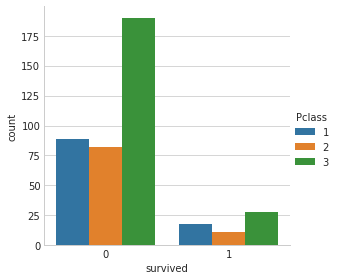

In [74]:
sns.factorplot('survived',data=check_model,kind='count',hue='Pclass')

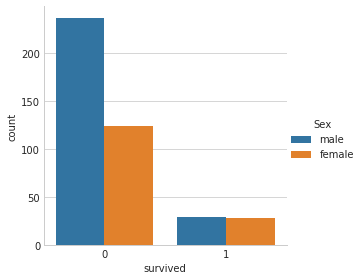

In [75]:
sns.factorplot('survived',data=check_model,kind='count',hue='Sex')